In [1]:
import pandas as pd
import matplotlib

%matplotlib inline

data = pd.read_csv('./kddcup99.csv')

In [2]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [3]:
data.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,494020.000000,494020,494020,494020,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf
freq,NaN,283602,281400,378439,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790
mean,47.979400,NaN,NaN,NaN,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,...,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412,NaN
std,707.747185,NaN,NaN,NaN,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,...,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [4]:
y = 'label'
x = data.drop(y, axis=1).columns.tolist()

In [5]:
data['label'] = data['label'].apply(lambda x: x if x == 'normal' else 'zAttack')

In [6]:
# data = data.sample(frac=0.1)

In [6]:
from sklearn.preprocessing import LabelEncoder as le
data[y] = le().fit_transform(data[y])

In [7]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(min_mem_size='25g')
data_h2o = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_121"; Java(TM) SE Runtime Environment (build 1.8.0_121-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from /anaconda2/envs/appian/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/rq/pty_1rdx10v83l8vn823chx80000gn/T/tmpawb0hdyg
  JVM stdout: /var/folders/rq/pty_1rdx10v83l8vn823chx80000gn/T/tmpawb0hdyg/h2o_loweew_started_from_python.out
  JVM stderr: /var/folders/rq/pty_1rdx10v83l8vn823chx80000gn/T/tmpawb0hdyg/h2o_loweew_started_from_python.err
  Server is running at http://127.0.0.1:54333
Connecting to H2O server at http://127.0.0.1:54333 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.9
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_loweew_ho0dqj
H2O cluster total nodes:,1
H2O cluster free memory:,23.96 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
for i in data.columns.tolist():
    t = data[i].dtypes
    if t == 'object':
        data_h2o[i] = data_h2o[i].asfactor()

In [9]:
data_h2o[y] = data_h2o[y].asfactor()

In [10]:
data_h2o.describe()

Rows:494020
Cols:42




,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
type,int,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,real,int,int,real,real,real,real,real,real,real,real,enum
mins,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,47.97939961944856,,,,3025.6157443018506,868.5307740577313,4.453261001578883e-05,0.006432937937735314,1.4169466823205539e-05,0.03451884539087489,0.00015181571596291647,0.14824501032346868,0.010212137160438856,0.00011133152503947209,3.6435771831099954e-05,0.011351767134933806,0.0010829521072021377,0.00010930731549329986,0.0010080563539937655,0.0,0.0,0.0013865835391279706,332.2863608760775,292.90713129023123,0.17668701671997078,0.1766091656208253,0.057433524958503686,0.05771905995708673,0.7915469211772812,0.020982429861139205,0.028996194486053225,232.47124812760646,188.6660519817011,0.7537812234322494,0.03090579328772114,0.6019359742520541,0.006683514837456002,0.17675432168738126,0.17644297801708422,0.058117728027205544,0.05741178494797794,
maxs,58329.0,,,,693375640.0,5155468.0,1.0,3.0,3.0,30.0,5.0,1.0,884.0,1.0,2.0,993.0,28.0,2.0,8.0,0.0,0.0,1.0,511.0,511.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,255.0,255.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
sigma,707.747185328066,,,,988219.1012247433,33040.03467172603,0.0066731339715261585,0.13480538413163562,0.0055102635036698155,0.7821033719503352,0.015519612608912112,0.3553430495055961,1.7983280775888888,0.010550798816426503,0.007792629962983473,2.0127203626019186,0.09641597625620138,0.011020021347660005,0.03648172690296021,0.0,0.0,0.037211069966698436,213.1471067203405,246.3227355222279,0.3807172586732713,0.38101688724887794,0.2316236937964337,0.23214720180970083,0.3881897726374489,0.08220557067781739,0.14239696716832953,64.74460109429212,106.0402046899831,0.4107799932516415,0.10925921395176642,0.481308976420087,0.04213291598577154,0.38059339963195,0.3809197508689398,0.23058972562326566,0.2301405423530586,
zeros,481670,,,,115342,408258,493998,492782,494016,490828,493957,420784,491796,493965,494008,493435,493755,493969,493566,494020,494020,493335,2,2,404786,405685,464947,464319,3627,382020,459377,2,2,11468,347030,142859,441888,399809,400944,458791,459804,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,tcp,http,SF,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0.0,tcp,http,SF,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0.0,tcp,http,SF,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0


In [11]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.psvm import H2OSupportVectorMachineEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator

glm_model = H2OGeneralizedLinearEstimator(nfolds=5, family="binomial", lambda_search=False, seed=42)
gbm_model = H2OGradientBoostingEstimator(nfolds=5, max_depth=7, seed=42)
rf_model = H2ORandomForestEstimator(nfolds=5, seed=42)
nb_model = H2ONaiveBayesEstimator(nfolds=5, seed=42)
svm_model = H2OSupportVectorMachineEstimator( seed=42)
xgb_model = H2OXGBoostEstimator(nfolds=5, seed=42)

In [12]:
train_h2o, val_h2o = data_h2o.split_frame([0.8], seed=42)

In [25]:
glm_model.train(x, y, training_frame=train_h2o, validation_frame=val_h2o)

In [26]:
glm_model.auc(valid=True)

0.9994492840590816

In [27]:
gbm_model.train(x, y, training_frame=train_h2o, validation_frame=val_h2o)

H2OJobCancelled: Job<$03017f0000013ed4ffffffff$_a11515cfb7721953b3abb7c04ad54a11> was cancelled by the user.

In [ ]:
gbm_model.auc(valid=True)

In [ ]:
rf_model.train(x, y, training_frame=train_h2o, validation_frame=val_h2o)

In [ ]:
rf_model.auc(valid=True)

In [13]:
xgb_model.train(x, y, training_frame=train_h2o, validation_frame=val_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [14]:
import subprocess
from subprocess import CalledProcessError
import time
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import operator
import numpy as np
from tqdm import *

def gen_surrogate(model, data, x, y):
    from h2o.backend import H2OLocalServer

    preds = model.predict(data)['p0']
    preds.columns = [y]
    frame_yhat = data.cbind(preds)

    yhat = y
    model_id = 'dt_surrogate_mojo'

    # train single tree surrogate model
    surrogate = H2OGradientBoostingEstimator(ntrees=1, seed=42,
                                             sample_rate=1,
                                             col_sample_rate=1,
                                             max_depth=3,
                                             model_id=model_id)

    _ = surrogate.train(x=x, y=yhat, training_frame=frame_yhat)

    # persist MOJO (compiled, representation of trained model)
    # from which to generate plot of surrogate
    mojo_path = surrogate.download_mojo(path='.')

    print(surrogate)
    print( 'Generated MOJO path:\n', mojo_path)
    
    details = False # print more info on tree, details = True
    title = 'Attack Decision Tree Surrogate'

    hs = H2OLocalServer()
    h2o_jar_path = hs._find_jar()
    print( 'Discovered H2O jar path:\n', h2o_jar_path)

    gv_file_name = model_id + '.gv'
    gv_args = str('-cp ' + h2o_jar_path +
                  ' hex.genmodel.tools.PrintMojo --tree 0 -i '
                  + mojo_path + ' -o').split()
    gv_args.insert(0, 'java')
    gv_args.append(gv_file_name)

    if details:
        gv_args.append('--detail')

    if title is not None:
        gv_args = gv_args + ['--title', title]

    print( 'Calling external process ...')
    print( ' '.join(gv_args))

    _ = subprocess.call(gv_args)
    
    png_file_name = model_id + '.png'
    png_args = str('dot -Tpng ' + gv_file_name + ' -o ' + png_file_name)
    png_args = png_args.split()

    print( 'Calling external process ...')
    print( ' '.join(png_args))

    _ = subprocess.call(png_args)
    
    display(Image((png_file_name)))
    
def par_dep_2d(xs1, xs2, fr, model, resolution=20):
    
    frame = h2o.deep_copy(fr, 'frame')
    # init empty Pandas frame w/ correct col names
    par_dep_frame = pd.DataFrame(columns=[xs1, xs2, 'partial_dependence'])
    
    # cache original data 
    col_cache1 = frame[xs1]
    col_cache2 = frame[xs2] 
    
    # determine values at which to calculate partial dependency
    # for xs1
    min1_ = frame[xs1].min()
    max1_ = frame[xs1].max()
    by1 = float((max1_ - min1_)/resolution)
    range1 = np.arange(min1_, max1_, by1)
    
    # determine values at which to calculate partial dependency
    # for xs2
    min2_ = frame[xs2].min()
    max2_ = frame[xs2].max()
    by2 = float((max2_ - min2_)/resolution)
    range2 = np.arange(min2_, max2_, by2)  
    
    # calculate partial dependency 
    for j in range1:
        for k in range2:
            frame[xs1] = j
            frame[xs2] = k
            par_dep_i = model.predict(frame)['p0']
            par_dep_j = par_dep_i.mean()[0]
            std_j = model.predict(frame)['p0'].sd()[0]
            pos_std, neg_std = par_dep_j + std_j, par_dep_j - std_j
            par_dep_frame = par_dep_frame.append({xs1:j,
                                                  xs2:k,
                                                  'partial_dependence': par_dep_j}, 
                                                  ignore_index=True)

    # return input frame to original cached state    
    frame[xs1] = col_cache1
    frame[xs2] = col_cache2

    # create 3-D grid 
    new_shape = (resolution, resolution)
    x = np.asarray(par_dep_frame[xs1]).reshape(new_shape)
    y = np.asarray(par_dep_frame[xs2]).reshape(new_shape)
    z = np.asarray(par_dep_frame['partial_dependence']).reshape(new_shape)

    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')

    # set axes labels
    ax.set_title('Partial Dependence for Attack')
    ax.set_xlabel(xs1)
    ax.set_ylabel(xs2)
    ax.set_zlabel('\nAttack')

    # surface
    surf = ax.plot_surface(x, y, z, 
                           cmap=cm.coolwarm, 
                           linewidth=0.05, 
                           rstride=1, 
                           cstride=1, 
                           antialiased=True)

    plt.tight_layout()
    outname = '3D-' + xs1 + '_' + xs2 + '.png'
    outname = outname.replace('(','').replace(')','')
    plt.savefig(outname)
    plt.show()

    
def get_quantile_dict(y, id_, frame):

    quantiles_df = frame.as_data_frame()
    quantiles_df.sort_values(y, inplace=True)
    quantiles_df.reset_index(inplace=True)

    percentiles_dict = {}
    percentiles_dict[0] = quantiles_df.loc[0, id_]
    percentiles_dict[99] = quantiles_df.loc[quantiles_df.shape[0]-1, id_]
    inc = quantiles_df.shape[0]//10

    for i in range(1, 10):
        percentiles_dict[i * 10] = quantiles_df.loc[i * inc,  id_]

    return percentiles_dict

def get_pairs(lst):
    keep = []
    nr = len(lst)
    for i in range(nr):
        for j in range(i+1, nr):
            keep.append([str(lst[i]),str(lst[j])])
    return keep


def plot_pairs(model, data):
    var_feats0 = model.varimp(use_pandas=True)['variable'].tolist()[:5]
    feat_pairs0 = get_pairs(var_feats0)

    for f in tqdm_notebook(feat_pairs0, desc="plotting 2D dependence"):
        par_dep_2d(xs1=f[0], xs2=f[1], fr=data, model=model, resolution=10)

xgboost prediction progress: |████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  dt_surrogate_mojo


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,1.0,169.0,3.0,3.0,3.0,8.0,8.0,8.0




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12631503571649524
RMSE: 0.3554082662467141
LogLoss: 0.4052290062676143
Mean Per-Class Error: 0.006918830010434696
AUC: 0.9958608304939669
pr_auc: 0.998838846513322
Gini: 0.9917216609879338

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7745093594912463: 


,,0,1,Error,Rate
0,0,19250.0,122.0,0.0063,(122.0/19372.0)
1,1,648.0,78592.0,0.0082,(648.0/79240.0)
2,Total,19898.0,78714.0,0.0078,(770.0/98612.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.774509,0.995125,5.0
1,max f2,0.774509,0.993141,5.0
2,max f0point5,0.809345,0.997241,4.0
3,max accuracy,0.774509,0.992192,5.0
4,max precision,0.822459,1.000000,0.0
5,max recall,0.715143,1.000000,6.0
6,max specificity,0.822459,1.000000,0.0
7,max absolute_mcc,0.774509,0.975655,5.0
8,max min_per_class_accuracy,0.774509,0.991822,5.0
9,max mean_per_class_accuracy,0.809345,0.993081,4.0



Gains/Lift Table: Avg response rate: 80.36 %, avg score: 80.07 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.784884,0.822457,1.244440,1.244440,0.999974,0.822457,0.999974,0.822457,0.976742,0.976742,24.444033,24.444033
1,,2,0.997505,0.715143,0.109389,1.002501,0.087900,0.721326,0.805563,0.800901,0.023258,1.000000,-89.061083,0.250086
2,,3,1.000000,0.710869,0.000000,1.000000,0.000000,0.710869,0.803553,0.800676,0.000000,1.000000,-100.000000,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-11-11 22:43:12,0.007 sec,0.0,0.397310,0.495437,0.500000,0.000000,1.00000,0.196447
1,,2019-11-11 22:43:13,0.274 sec,1.0,0.355408,0.405229,0.995861,0.998839,1.24444,0.007808



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,count,13723.687500,1.000000,0.924858
1,flag,478.159424,0.034842,0.032224
2,hot,382.776062,0.027892,0.025796
3,service,220.778488,0.016087,0.014879
4,srv_count,24.329672,0.001773,0.001640
5,dst_host_srv_count,7.107198,0.000518,0.000479
6,protocol_type,1.864485,0.000136,0.000126
7,duration,0.000000,0.000000,0.000000
8,src_bytes,0.000000,0.000000,0.000000
9,dst_bytes,0.000000,0.000000,0.000000



See the whole table with table.as_data_frame()

Generated MOJO path:
 /Users/loweew/appian-hc/Projects/EDA/dt_surrogate_mojo.zip
Discovered H2O jar path:
 /anaconda2/envs/appian/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
Calling external process ...
java -cp /anaconda2/envs/appian/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i /Users/loweew/appian-hc/Projects/EDA/dt_surrogate_mojo.zip -o dt_surrogate_mojo.gv --title Attack Decision Tree Surrogate
Calling external process ...
dot -Tpng dt_surrogate_mojo.gv -o dt_surrogate_mojo.png


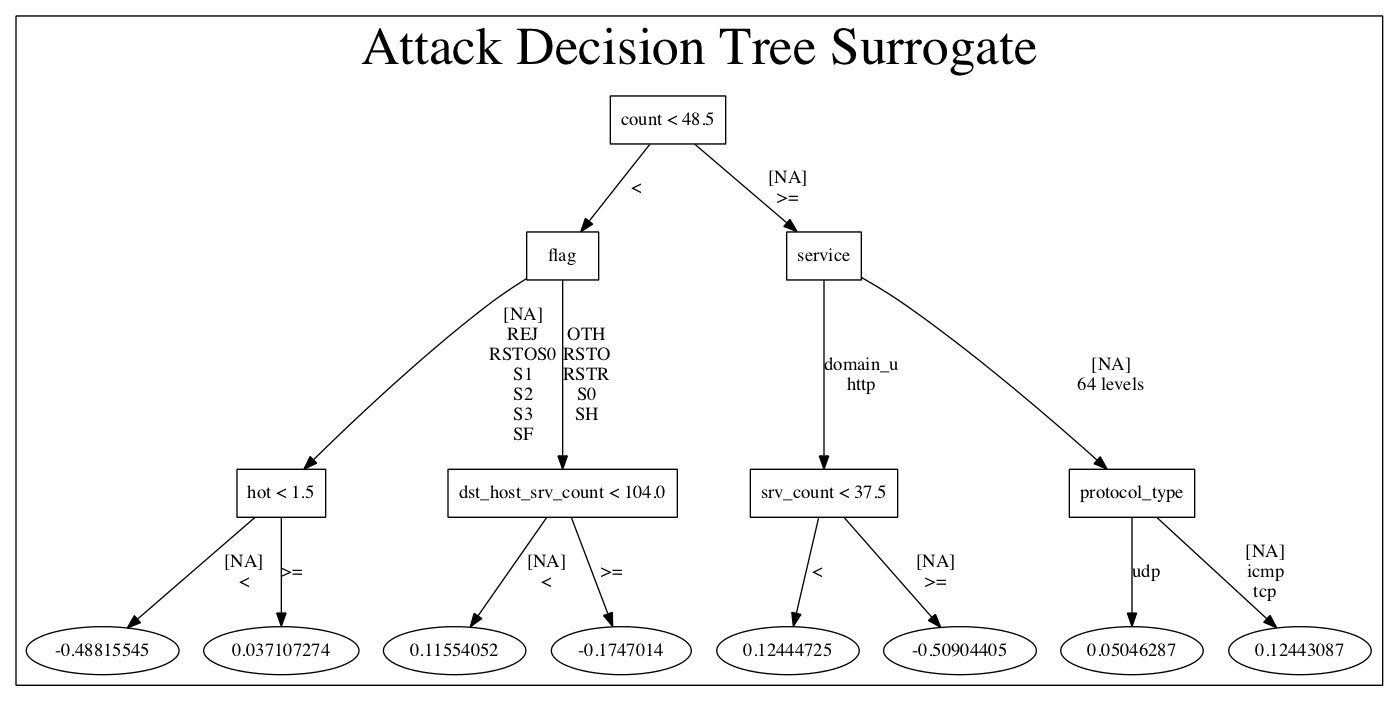

In [15]:
gen_surrogate(xgb_model, val_h2o, x, y)

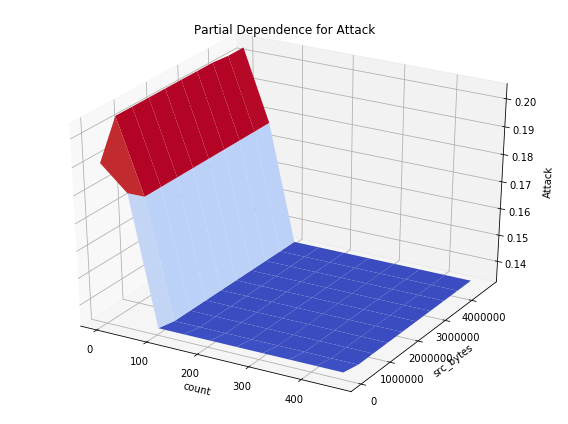

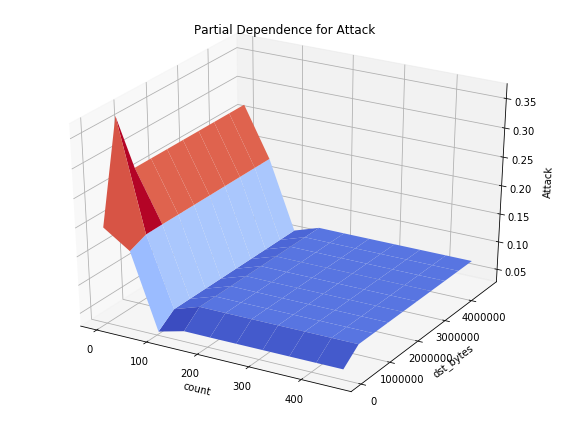

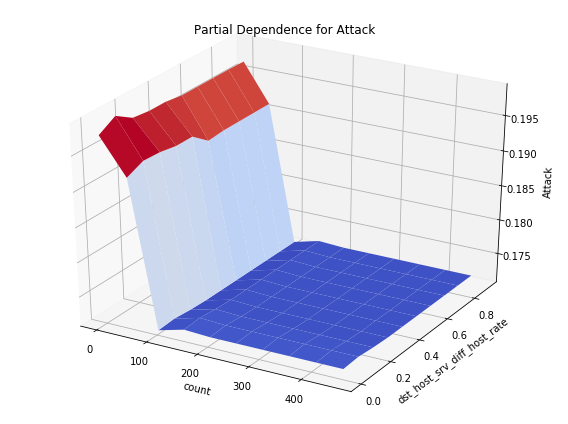

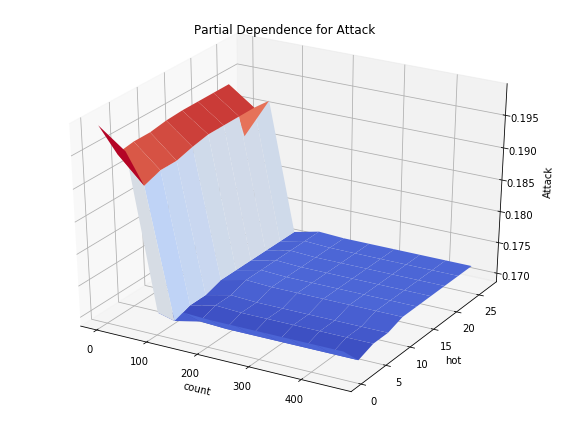

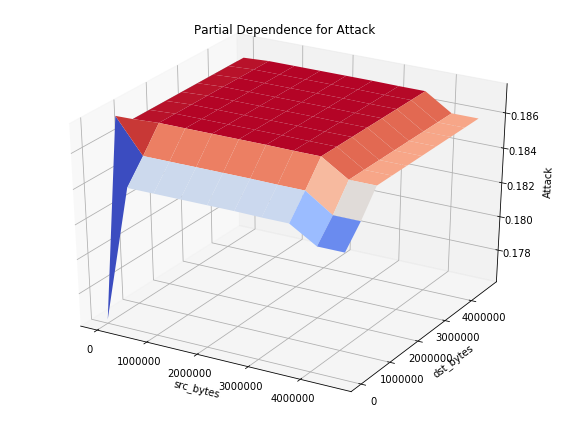

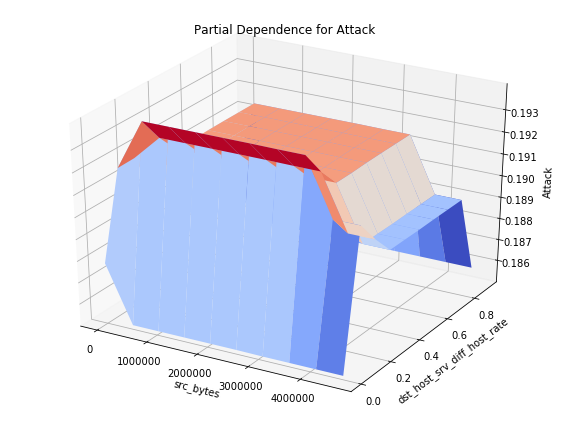

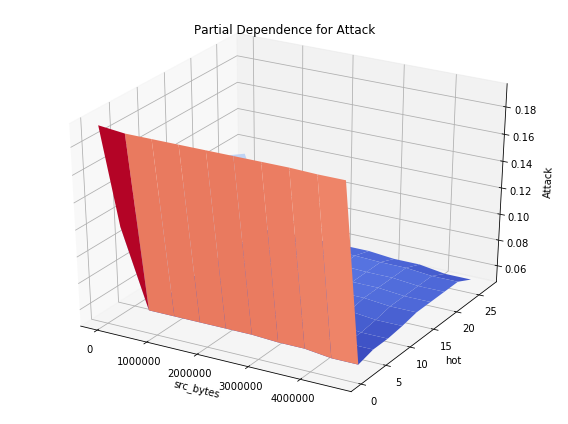

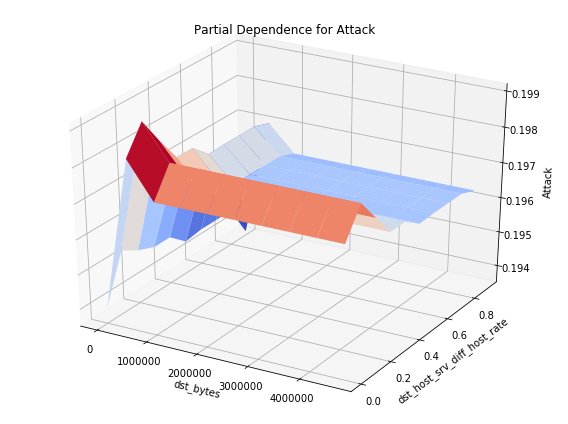

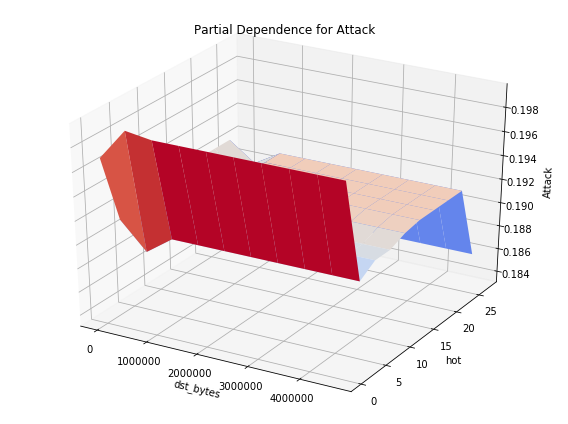

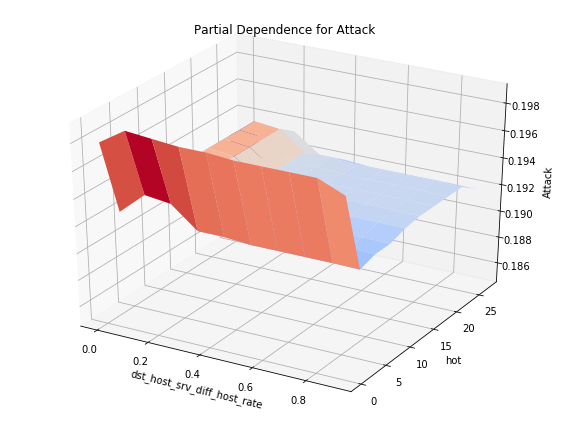

In [23]:
h2o.no_progress()
plot_pairs(xgb_model, val_h2o)

/anaconda2/envs/appian/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


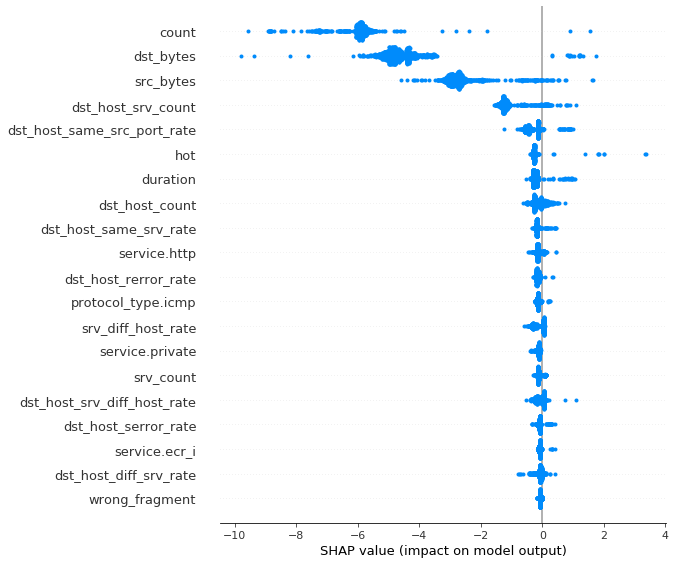

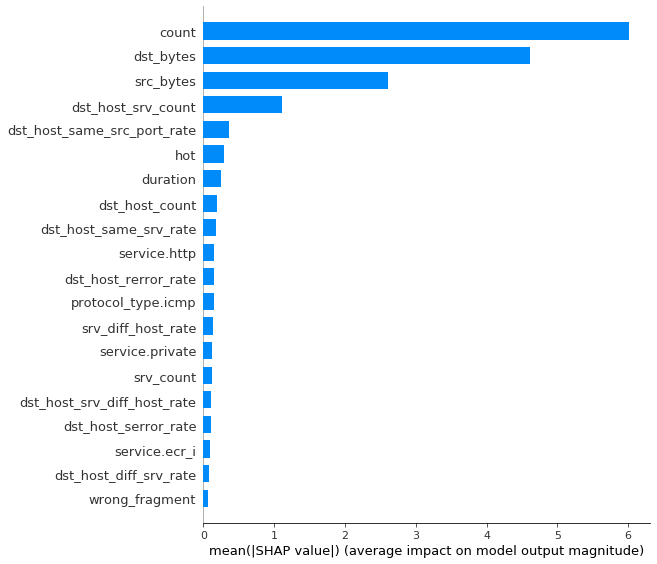

In [22]:
import shap

contributions = xgb_model.predict_contributions(val_h2o)
shap.initjs()
contributions_matrix = contributions.as_data_frame().as_matrix()[:1000]
# Calculate SHAP values for all features
shap_values = contributions_matrix[:,0:-1]

# Expected values is the last returned column
expected_value = contributions_matrix[:,:-1].min()

xx = contributions.columns[:-1]
# Visualize the training set predictions
shap.force_plot(expected_value, shap_values, xx)

# Summarize the effects of all the features
shap.summary_plot(shap_values, xx)

# View the same summary as a bar chart
shap.summary_plot(shap_values, xx, plot_type="bar")

In [ ]:
aml = H2OAutoML(max_runtime_secs = 60 * 60 * 5, stopping_metric='AUC', stopping_rounds=5, stopping_tolerance=0.005,
                keep_cross_validation_predictions=False, keep_cross_validation_models=False,
               seed=12345)
aml.train(x = x, y = y,
          training_frame = train_h2o, 
          validation_frame = val_h2o
         )